## 필요한 라이브러리 로드

In [573]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터셋 로드

In [574]:
train = pd.read_csv('auction_data/auction_master_train.csv')
test = pd.read_csv('auction_data/auction_master_test.csv')
print(train.shape, test.shape)

(1933, 41) (829, 41)


In [575]:
train.set_index("Auction_key", inplace=True)
train.head()

,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
Auction_key,,,,,,,,,,,,,,,,,,,,,
2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [576]:
test.set_index("Auction_key", inplace=True)
test.head()

,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
Auction_key,,,,,,,,,,,,,,,,,,,,,
1778,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,...,"**1차감정:235,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1779,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,...,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1784,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,...,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1786,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,...,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1790,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,...,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0


In [577]:
set(train.columns)-set(test.columns)

set()

## info()

In [578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 2687 to 937
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_class                1933 non-null   object 
 1   Bid_class                    1933 non-null   object 
 2   Claim_price                  1933 non-null   int64  
 3   Appraisal_company            1933 non-null   object 
 4   Appraisal_date               1933 non-null   object 
 5   Auction_count                1933 non-null   int64  
 6   Auction_miscarriage_count    1933 non-null   int64  
 7   Total_land_gross_area        1933 non-null   float64
 8   Total_land_real_area         1933 non-null   float64
 9   Total_land_auction_area      1933 non-null   float64
 10  Total_building_area          1933 non-null   float64
 11  Total_building_auction_area  1933 non-null   float64
 12  Total_appraisal_price        1933 non-null   int64  
 13  Minimum_sales_pr

## histogram

array([[<AxesSubplot: title={'center': 'Claim_price'}>,
        <AxesSubplot: title={'center': 'Auction_count'}>,
        <AxesSubplot: title={'center': 'Auction_miscarriage_count'}>,
        <AxesSubplot: title={'center': 'Total_land_gross_area'}>],
       [<AxesSubplot: title={'center': 'Total_land_real_area'}>,
        <AxesSubplot: title={'center': 'Total_land_auction_area'}>,
        <AxesSubplot: title={'center': 'Total_building_area'}>,
        <AxesSubplot: title={'center': 'Total_building_auction_area'}>],
       [<AxesSubplot: title={'center': 'Total_appraisal_price'}>,
        <AxesSubplot: title={'center': 'Minimum_sales_price'}>,
        <AxesSubplot: title={'center': 'addr_bunji1'}>,
        <AxesSubplot: title={'center': 'addr_bunji2'}>],
       [<AxesSubplot: title={'center': 'Total_floor'}>,
        <AxesSubplot: title={'center': 'Current_floor'}>,
        <AxesSubplot: title={'center': 'road_bunji1'}>,
        <AxesSubplot: title={'center': 'road_bunji2'}>],
       [<

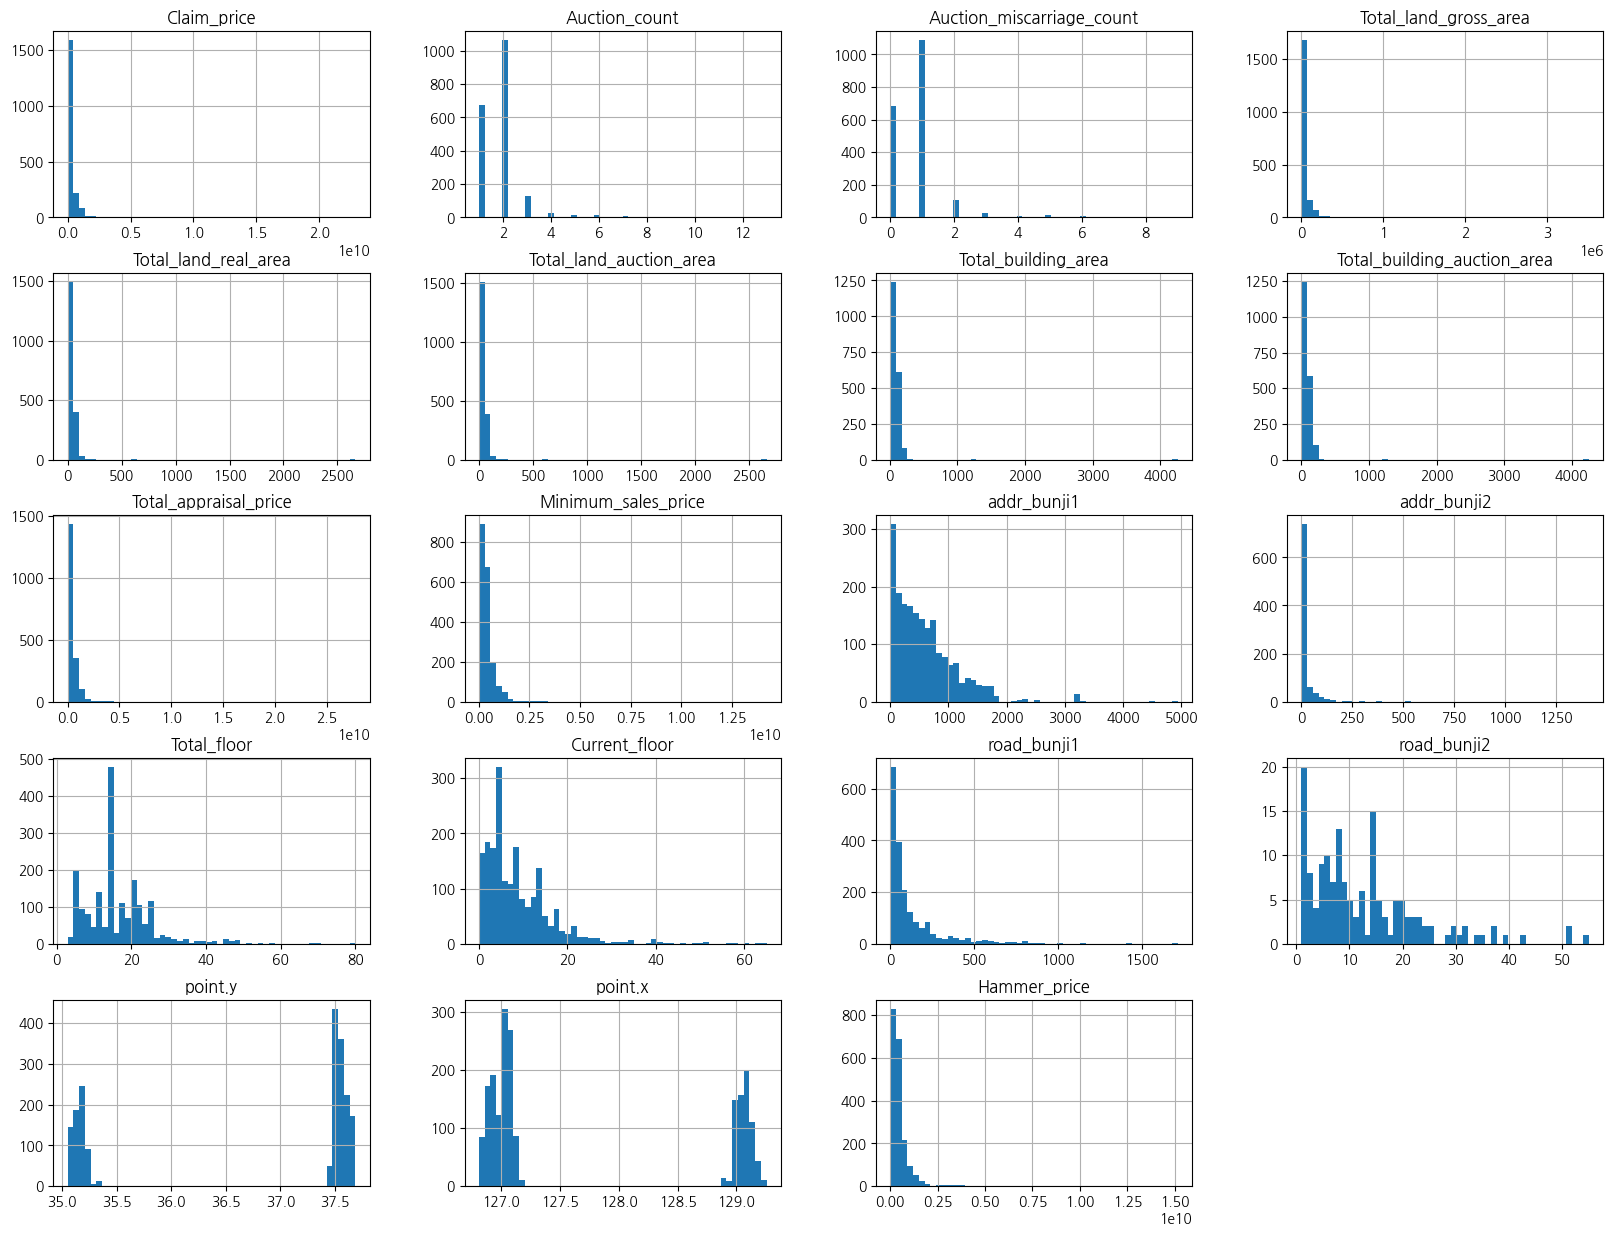

In [579]:
train.hist(figsize=(20,15), bins=50)

array([[<AxesSubplot: title={'center': 'Claim_price'}>,
        <AxesSubplot: title={'center': 'Auction_count'}>,
        <AxesSubplot: title={'center': 'Auction_miscarriage_count'}>,
        <AxesSubplot: title={'center': 'Total_land_gross_area'}>],
       [<AxesSubplot: title={'center': 'Total_land_real_area'}>,
        <AxesSubplot: title={'center': 'Total_land_auction_area'}>,
        <AxesSubplot: title={'center': 'Total_building_area'}>,
        <AxesSubplot: title={'center': 'Total_building_auction_area'}>],
       [<AxesSubplot: title={'center': 'Total_appraisal_price'}>,
        <AxesSubplot: title={'center': 'Minimum_sales_price'}>,
        <AxesSubplot: title={'center': 'addr_bunji1'}>,
        <AxesSubplot: title={'center': 'addr_bunji2'}>],
       [<AxesSubplot: title={'center': 'Total_floor'}>,
        <AxesSubplot: title={'center': 'Current_floor'}>,
        <AxesSubplot: title={'center': 'road_bunji1'}>,
        <AxesSubplot: title={'center': 'road_bunji2'}>],
       [<

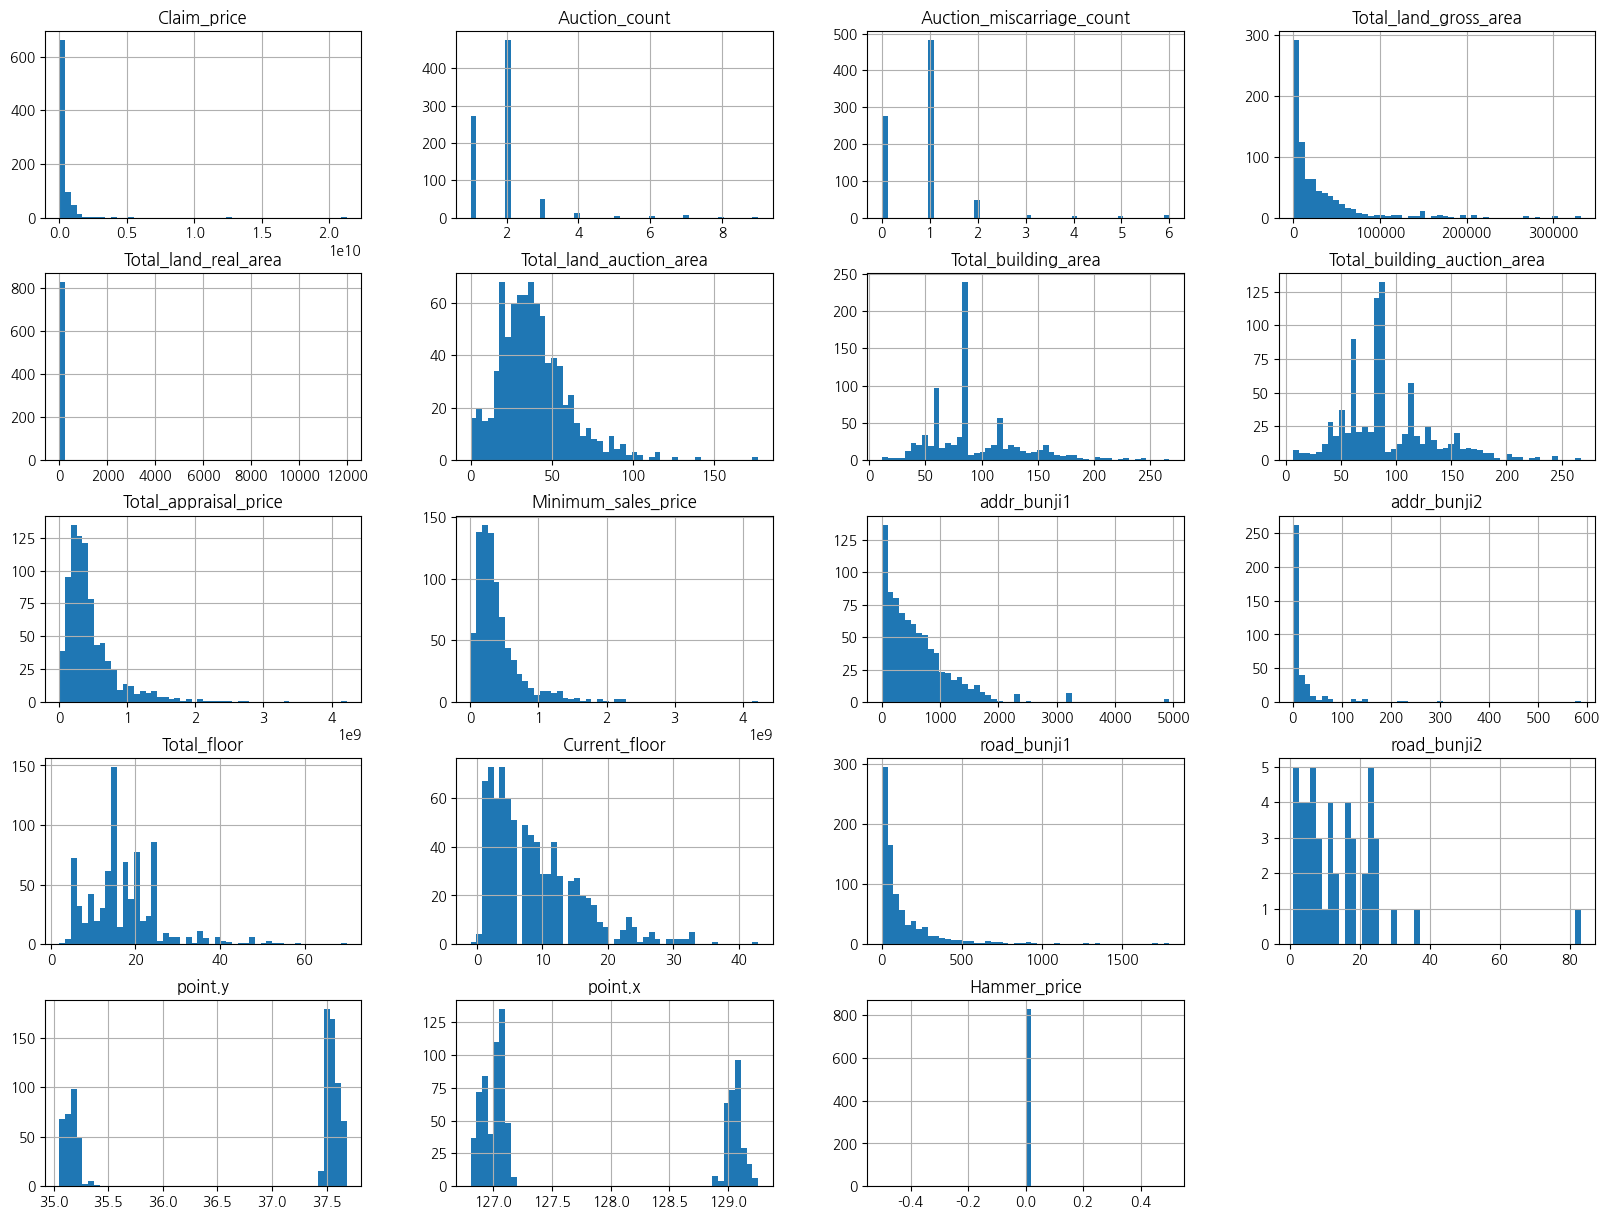

In [580]:
test.hist(figsize=(20,15), bins=50)

## correlation

In [581]:
corr = train.corr()
corr

/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_58089/2148168359.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
Claim_price,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.002303,-0.003226,0.016466,0.043258,-0.035446,0.212796,0.095939,-0.103605,0.267728
Auction_count,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,0.071038,-0.036716,-0.028857,0.010674,-0.052329,-0.029124,-0.058632,0.005644,-0.054074,0.051634,-0.016999
Auction_miscarriage_count,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,0.077547,-0.033039,-0.030271,0.007966,-0.045343,-0.021852,-0.054452,-0.020141,-0.057197,0.054032,-0.011296
Total_land_gross_area,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.080570,-0.020155,0.100557,0.094385,0.050938,0.149867,0.014971,-0.014285,0.070466
Total_land_real_area,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,0.045710,0.005257,-0.072543,-0.062673,-0.003086,-0.069489,0.060602,-0.062621,0.696099
Total_land_auction_area,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,0.050015,0.004985,-0.068385,-0.061274,-0.001908,-0.069589,0.055776,-0.057796,0.700639
Total_building_area,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.022466,0.001535,0.107069,0.071110,-0.008097,0.180631,0.062797,-0.064572,0.768454
Total_building_auction_area,0.204000,0.104286,0.114779,0.016474,0.934759,0.941681,0.993533,1.000000,0.901988,0.787366,0.027429,0.001985,0.108707,0.069819,-0.005029,0.170577,0.055730,-0.057502,0.772839
Total_appraisal_price,0.248846,0.071038,0.077547,0.041896,0.842248,0.845243,0.900302,0.901988,1.000000,0.960357,0.005726,-0.001356,0.169577,0.151757,0.008064,0.214252,0.220942,-0.222110,0.953464
Minimum_sales_price,0.261076,-0.036716,-0.033039,0.067135,0.711515,0.715891,0.783299,0.787366,0.960357,1.000000,-0.000994,-0.002788,0.223407,0.201913,0.020318,0.211297,0.285141,-0.285804,0.994592


/var/folders/vl/mmn9ctlx4m58c_kvrkgwprlm0000gn/T/ipykernel_58089/975658810.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


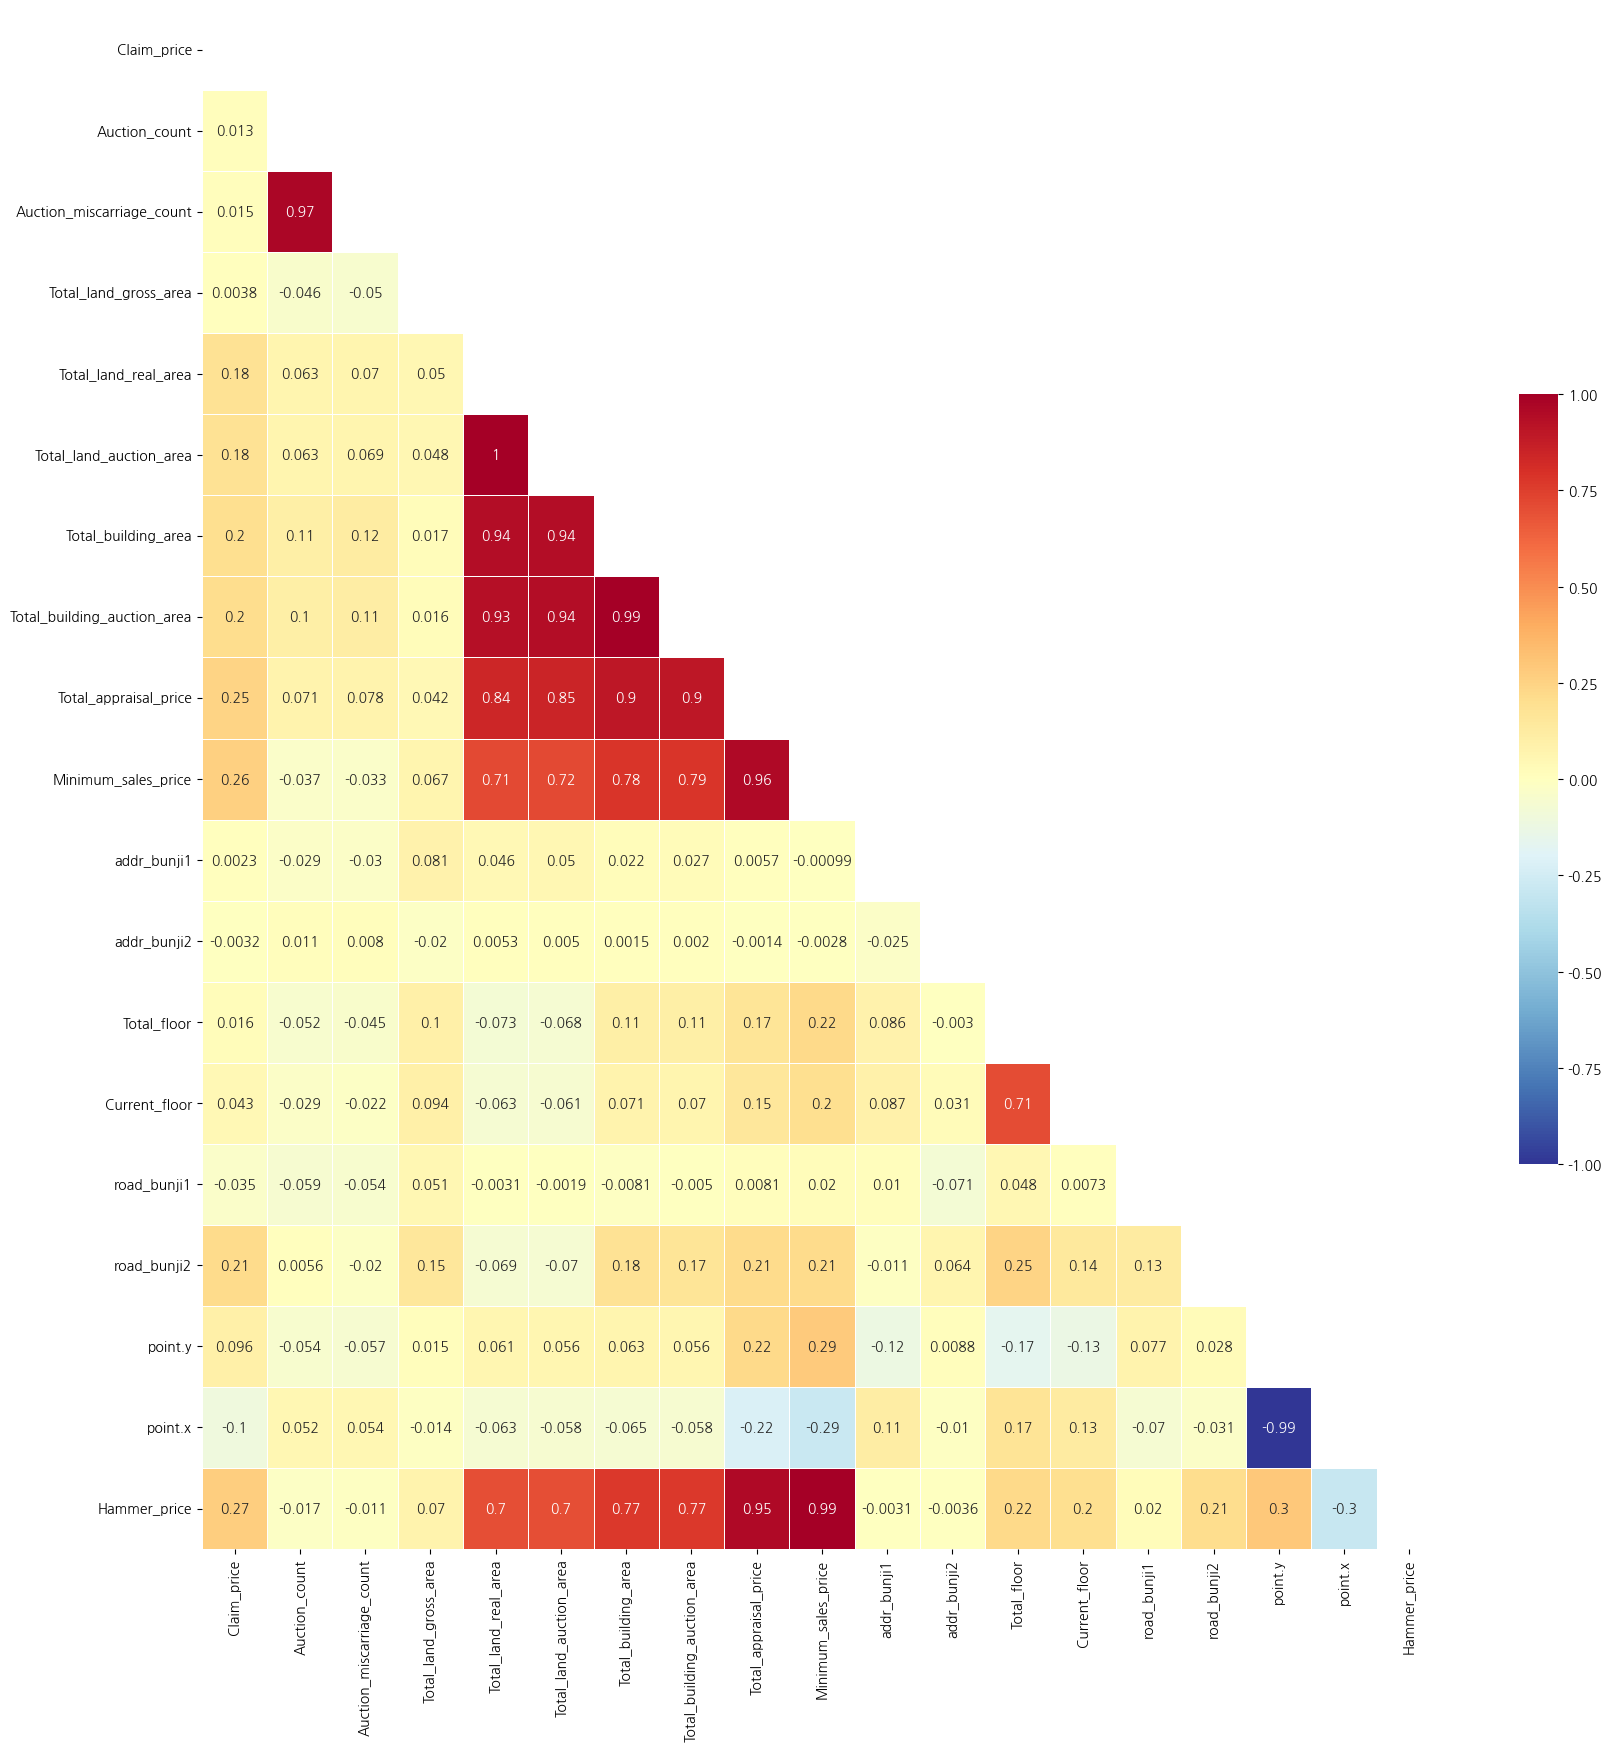

In [582]:
fig, ax = plt.subplots( figsize=(20,20) )

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 정답값이자 예측해야 될 값

In [583]:
label_name = "Hammer_price"
label_name

'Hammer_price'

## 학습, 예측에 사용할 컬럼

In [584]:
train.columns

Index(['Auction_class', 'Bid_class', 'Claim_price', 'Appraisal_company',
       'Appraisal_date', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_gross_area', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'First_auction_date', 'Final_auction_date',
       'Final_result', 'Creditor', 'addr_do', 'addr_si', 'addr_dong',
       'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2', 'addr_etc',
       'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [585]:
train.select_dtypes(include="number").columns

Index(['Claim_price', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_gross_area', 'Total_land_real_area',
       'Total_land_auction_area', 'Total_building_area',
       'Total_building_auction_area', 'Total_appraisal_price',
       'Minimum_sales_price', 'addr_bunji1', 'addr_bunji2', 'Total_floor',
       'Current_floor', 'road_bunji1', 'road_bunji2', 'point.y', 'point.x',
       'Hammer_price'],
      dtype='object')

### Auction_class Binary Encoding

In [586]:
set(train.Auction_class)-set(test.Auction_class)

set()

In [587]:
train.Auction_class.value_counts()

임의    1439
강제     494
Name: Auction_class, dtype: int64

In [588]:
train["Auction_임의"] = train["Auction_class"] == "임의"
test["Auction_임의"] = test["Auction_class"] == "임의"

display(train["Auction_임의"].head(2))
display(test["Auction_임의"].head(2))

Auction_key
2687    True
2577    True
Name: Auction_임의, dtype: bool

Auction_key
1778    False
1779    False
Name: Auction_임의, dtype: bool

### Apartment_usage Binary Encoding

In [589]:
set(train.Apartment_usage)-set(test.Apartment_usage)

set()

In [590]:
train.Apartment_usage.value_counts()

아파트     1656
주상복합     277
Name: Apartment_usage, dtype: int64

In [591]:
train["Apartment"] = train["Apartment_usage"] == "아파트"
test["Apartment"] = test["Apartment_usage"] == "아파트"

display(train["Apartment"].head(2))
display(test["Apartment"].head(2))

Auction_key
2687    False
2577     True
Name: Apartment, dtype: bool

Auction_key
1778    False
1779    False
Name: Apartment, dtype: bool

### addr_do Binary-Encoding

In [592]:
set(train.addr_do)-set(test.addr_do)

set()

In [593]:
train.addr_do.value_counts()

서울    1242
부산     691
Name: addr_do, dtype: int64

In [594]:
train["Seoul"] = train["addr_do"] == "서울"
test["Seoul"] = test["addr_do"] == "서울"

display(train["Seoul"].head(2))
display(test["Seoul"].head(2))

Auction_key
2687    False
2577    False
Name: Seoul, dtype: bool

Auction_key
1778    False
1779    False
Name: Seoul, dtype: bool

### addr_si 

In [595]:
set(train.addr_si)-set(test.addr_si)

{'종로구'}

In [596]:
train.addr_si

Auction_key
2687    해운대구
2577    해운대구
2197     사상구
2642      남구
1958     사하구
        ... 
1567     도봉구
1295     노원구
254       중구
1486     도봉구
937      강서구
Name: addr_si, Length: 1933, dtype: object

In [597]:
train = train.drop(index=train[train['addr_si'] == '종로구'].index, axis='rows')
set(train.addr_si)-set(test.addr_si)

set()

In [598]:
pd.get_dummies(test[["addr_si"]])

,addr_si_강남구,addr_si_강동구,addr_si_강북구,addr_si_강서구,addr_si_관악구,addr_si_광진구,addr_si_구로구,addr_si_금정구,addr_si_금천구,addr_si_기장군,...,addr_si_수영구,addr_si_양천구,addr_si_연제구,addr_si_영도구,addr_si_영등포구,addr_si_용산구,addr_si_은평구,addr_si_중구,addr_si_중랑구,addr_si_해운대구
Auction_key,,,,,,,,,,,,,,,,,,,,,
1778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [599]:
pd.get_dummies(train[["addr_si"]])

,addr_si_강남구,addr_si_강동구,addr_si_강북구,addr_si_강서구,addr_si_관악구,addr_si_광진구,addr_si_구로구,addr_si_금정구,addr_si_금천구,addr_si_기장군,...,addr_si_수영구,addr_si_양천구,addr_si_연제구,addr_si_영도구,addr_si_영등포구,addr_si_용산구,addr_si_은평구,addr_si_중구,addr_si_중랑구,addr_si_해운대구
Auction_key,,,,,,,,,,,,,,,,,,,,,
2687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Total_floor & Current_floor 파생 변수

In [600]:
train['Floor_ratio'] = train.Current_floor / train.Total_floor
train[['Floor_ratio', 'Current_floor', 'Total_floor']].head(5)

,Floor_ratio,Current_floor,Total_floor
Auction_key,,,
2687,0.111111,5,45
2577,0.728571,51,70
2197,0.933333,14,15
2642,0.550000,11,20
1958,1.000000,7,7


In [601]:
test['Floor_ratio'] = test.Current_floor / test.Total_floor
test[['Floor_ratio', 'Current_floor', 'Total_floor']].head(5)

,Floor_ratio,Current_floor,Total_floor
Auction_key,,,
1778,0.333333,5,15
1779,0.400000,6,15
1784,0.533333,8,15
1786,0.600000,9,15
1790,0.733333,11,15


### Preserve_regist_date 연도만 가져와서 파생 변수

In [602]:
train["Preserve_regist_year"] = train.Preserve_regist_date.str.split().str[0].str.split("-").str[0].astype(int)
train[["Preserve_regist_date", "Preserve_regist_year"]].head(5)

,Preserve_regist_date,Preserve_regist_year
Auction_key,,
2687,2009-07-14 00:00:00,2009
2577,2011-12-16 00:00:00,2011
2197,1992-07-31 00:00:00,1992
2642,2001-07-13 00:00:00,2001
1958,2001-11-27 00:00:00,2001


In [603]:
test["Preserve_regist_year"] = test.Preserve_regist_date.str.split().str[0].str.split("-").str[0].astype(int)
test[["Preserve_regist_date", "Preserve_regist_year"]].tail(5)

,Preserve_regist_date,Preserve_regist_year
Auction_key,,
1762,2011-12-13 00:00:00,2011
1767,2005-12-15 00:00:00,2005
1770,1996-05-08 00:00:00,1996
1772,2009-02-19 00:00:00,2009
1774,1999-05-14 00:00:00,1999


In [604]:
print(train[train.Preserve_regist_year == 1111].shape)
print(test[test.Preserve_regist_year == 1111].shape)

(43, 45)
(11, 45)


In [605]:
# 1111 날짜 있는 것 다 없애기

train = train.drop(index=train[train.Preserve_regist_year == 1111].index, axis='rows')

print(train[train.Preserve_regist_year == 1111].shape)

(0, 45)


In [606]:
train.shape

(1873, 45)

### 학습 및 예측에 사용할 칼럼

In [607]:
feature_names = ['Auction_임의', 'Claim_price', 'Auction_count', 
                'Auction_miscarriage_count', 'Total_land_auction_area',
                'Total_building_auction_area', 'Total_appraisal_price', 
                'Minimum_sales_price', 'Seoul', 'addr_si', 'Apartment',
                'Preserve_regist_year', 'Floor_ratio'
                ]
len(feature_names)

13

In [608]:
train[feature_names].select_dtypes(include="number").columns

Index(['Claim_price', 'Auction_count', 'Auction_miscarriage_count',
       'Total_land_auction_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Preserve_regist_year',
       'Floor_ratio'],
      dtype='object')

## 결측치

In [609]:
train[feature_names].isnull().sum()

Auction_임의                     0
Claim_price                    0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_auction_area        0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
Seoul                          0
addr_si                        0
Apartment                      0
Preserve_regist_year           0
Floor_ratio                    0
dtype: int64

In [610]:
test[feature_names].isnull().sum()

Auction_임의                     0
Claim_price                    0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_auction_area        0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
Seoul                          0
addr_si                        0
Apartment                      0
Preserve_regist_year           0
Floor_ratio                    0
dtype: int64

## 학습, 예측 데이터셋 만들기

In [611]:
X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
X_train.head(2)

(1873, 50)


,Auction_임의,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_auction_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Seoul,Apartment,...,addr_si_수영구,addr_si_양천구,addr_si_연제구,addr_si_영도구,addr_si_영등포구,addr_si_용산구,addr_si_은평구,addr_si_중구,addr_si_중랑구,addr_si_해운대구
Auction_key,,,,,,,,,,,,,,,,,,,,,
2687,True,1766037301,2,1,37.35,181.77,836000000,668800000,False,False,...,0,0,0,0,0,0,0,0,0,1
2577,True,152946867,2,1,18.76,118.38,1073000000,858400000,False,True,...,0,0,0,0,0,0,0,0,0,1


In [612]:
X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
X_test.head(2)

(829, 50)


,Auction_임의,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_auction_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Seoul,Apartment,...,addr_si_수영구,addr_si_양천구,addr_si_연제구,addr_si_영도구,addr_si_영등포구,addr_si_용산구,addr_si_은평구,addr_si_중구,addr_si_중랑구,addr_si_해운대구
Auction_key,,,,,,,,,,,,,,,,,,,,,
1778,False,1087000000,7,6,18.22,107.28,244565981,100174000,False,False,...,0,0,0,0,0,0,0,0,0,0
1779,False,1087000000,6,5,16.65,98.08,228745632,117118000,False,False,...,0,0,0,0,0,0,0,0,0,0


In [613]:
set(X_train.columns) - set(X_test.columns)

set()

In [614]:
y_train = train[label_name]
print(y_train.shape)
y_train.head(2)

(1873,)


Auction_key
2687    760000000
2577    971889999
Name: Hammer_price, dtype: int64

## 머신러닝 알고리즘 가져오기

In [615]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = DecisionTreeRegressor(random_state=42)
model = RandomForestRegressor(random_state=42, n_estimators= 100)

model

RandomForestRegressor(random_state=42)

In [616]:
# LINEAR REGRESSION 테스트 해보기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=.2, random_state=42)

rg = LinearRegression()
rg.fit(X_train2, y_train2)
rg.score(X_train2, y_train2)

0.9862442910720497

In [617]:
# GRIDCV 해보기

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 350, 500],
    # 'criterion': ['gini','entropy'],
    'max_depth': [None, 3, 5, 7, 9, 11, 13, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf = GridSearchCV(
                        estimator=model, param_grid=param_grid,
                        cv=5, n_jobs=-1
                      )

grid_rf.fit(X_train2, y_train2)

grid_rf.best_params_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

{'max_depth': 13, 'max_features': 'auto', 'n_estimators': 350}

In [618]:
# GRIDCV에 맞춰서 알고리즘 다시 불러오기

model = RandomForestRegressor(random_state=42, n_estimators= 350, max_depth=13)

## 정확도

In [619]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

valid_accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
valid_accuracy

0.9794995334485798

## 모델 학습

In [620]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, n_estimators=350, random_state=42)

## 예측

In [621]:
y_predict = model.predict(X_test).astype(int)
y_predict

array([ 122537439,  145723492,  124445651,  124495314,  124372405,
        124248849,  145898472,  195484661,  200549994,  312172281,
        177297774,   65687780,   88729810,   66931331,  418855601,
         65884920,  443528759,  109128892,  115848101,  176373350,
         38184610,  556504285,  168415472,  170161055,  141233012,
        308937886,  137553928,  322134507,  159982489,  233951139,
        108651904,   83172440,  329308568,  107964942,  133662754,
        189304381,  236629425,  183415109,  195663960,  456786789,
         72948499,  351517494,  357708198,  176751150,  282938664,
        172934438,  105524830,  611165185,  155473974,  107050394,
         22128731,  189253014,  308313900,  108914890,   88036028,
        133696869,   88435587,  241048489,  347861532,   84243333,
         97807148,  294807815,  419907213,  195245488,  155741405,
        510336863,  505955142,  151408001,  290359331,  108286004,
        266688865,  391523235,  255546685,  163796864,  292255

## 피처 중요도

In [622]:
model.feature_importances_

array([7.02468215e-04, 1.74645188e-03, 1.66147233e-04, 1.46601090e-04,
       1.25511701e-03, 2.43165324e-03, 5.75638341e-02, 9.30817729e-01,
       2.73369805e-05, 1.99208274e-04, 1.47583667e-03, 2.40539223e-03,
       1.90069218e-04, 1.42864195e-05, 5.73547598e-06, 1.99646013e-05,
       2.30498608e-05, 8.86983955e-06, 1.03373799e-05, 8.42006265e-06,
       4.20402563e-06, 3.92190423e-06, 4.47900557e-06, 1.64069553e-05,
       9.11663885e-06, 2.38858798e-07, 1.35920370e-05, 3.69876224e-06,
       2.60628152e-05, 8.65337585e-05, 1.21725442e-05, 7.67563822e-06,
       1.32914235e-06, 3.96296491e-06, 3.45633694e-06, 1.70553198e-05,
       1.74446330e-04, 4.35273446e-05, 2.78501346e-06, 1.58456484e-04,
       7.34732142e-06, 4.69489236e-05, 2.06265895e-06, 1.50886880e-06,
       5.12421913e-05, 3.23389003e-05, 9.21787974e-06, 1.13727311e-05,
       5.78020723e-06, 2.05495850e-05])

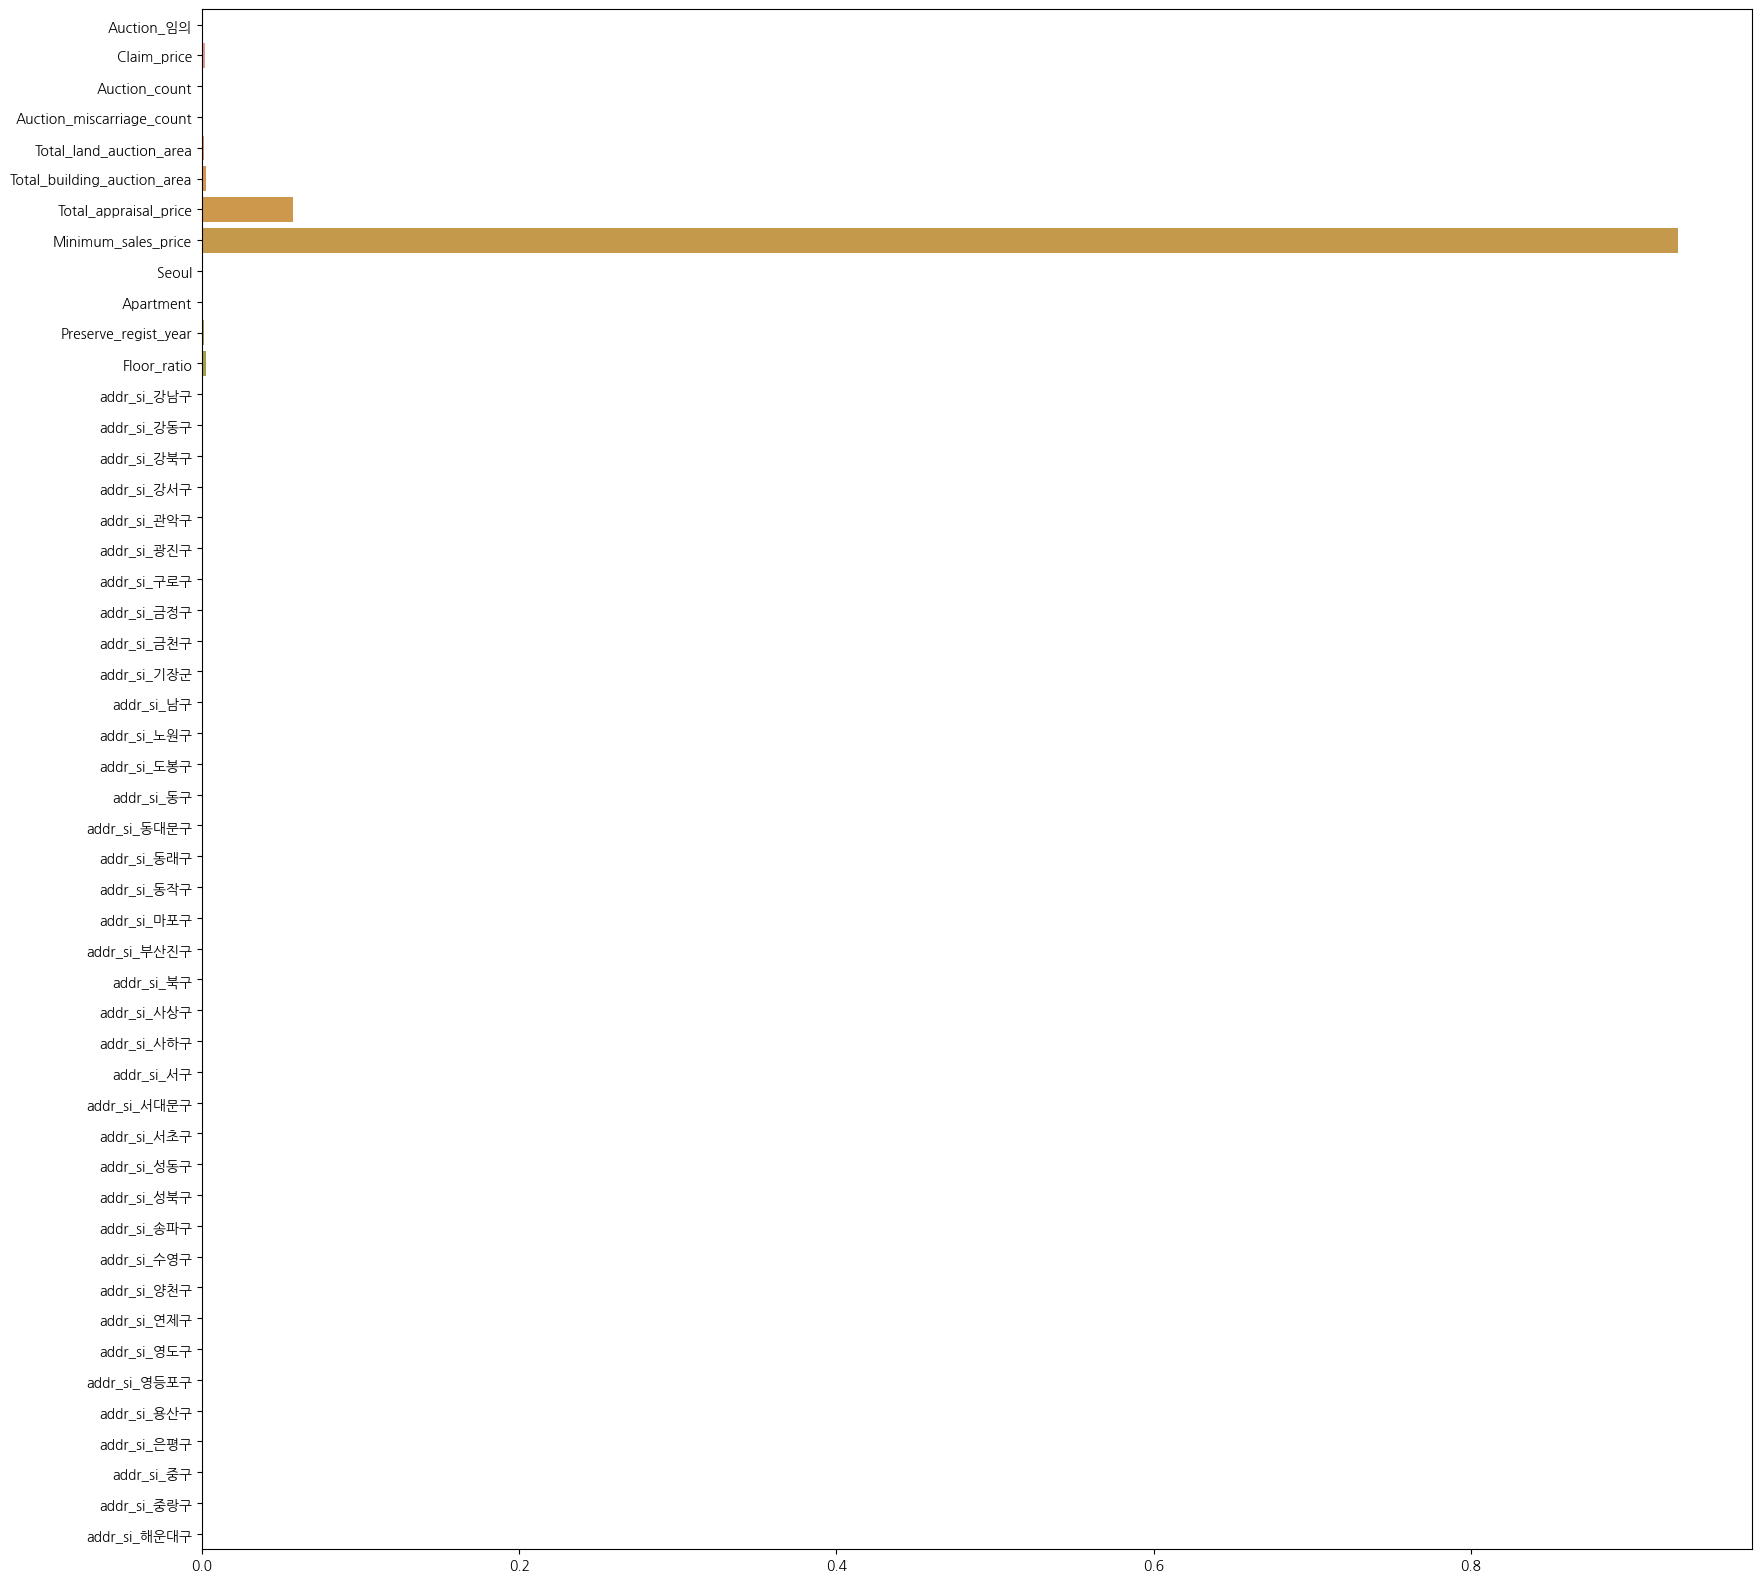

In [623]:
fig, ax = plt.subplots( figsize=(20,20) )
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)
plt.show()

# DACON에 제출하기

In [624]:
submit = pd.read_csv("data/auction_data/Auction_submission.csv", index_col="Auction_key")
submit.head(2)

,Hammer_price
Auction_key,
1778,0
1779,0


In [625]:
submit["Hammer_price"] = y_predict
submit.head(2)

,Hammer_price
Auction_key,
1778,122537439
1779,145723492


In [626]:
file_name = f"data/auction_data/submit_{valid_accuracy:.5f}.csv"
file_name

'data/auction_data/submit_0.97950.csv'

In [627]:
submit.to_csv(file_name)

In [628]:
pd.read_csv(file_name).head(2)

,Auction_key,Hammer_price
0,1778,122537439
1,1779,145723492
